In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Applying PCA


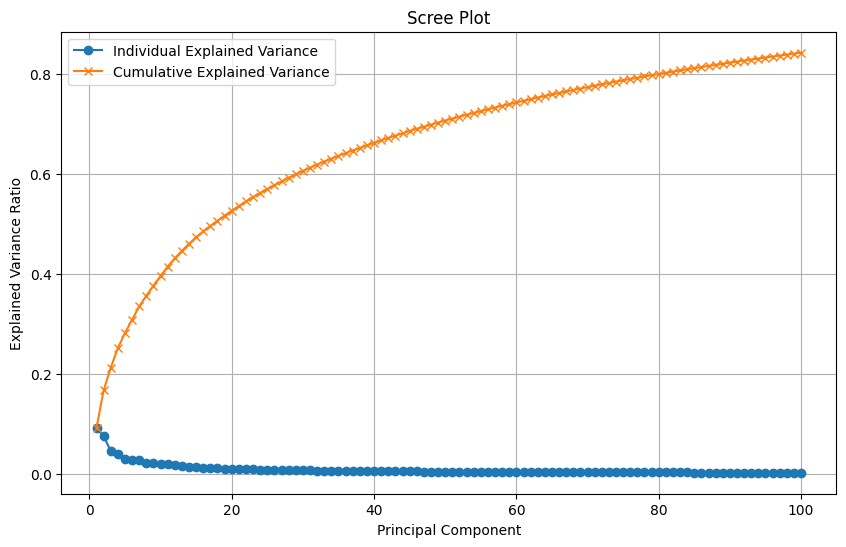

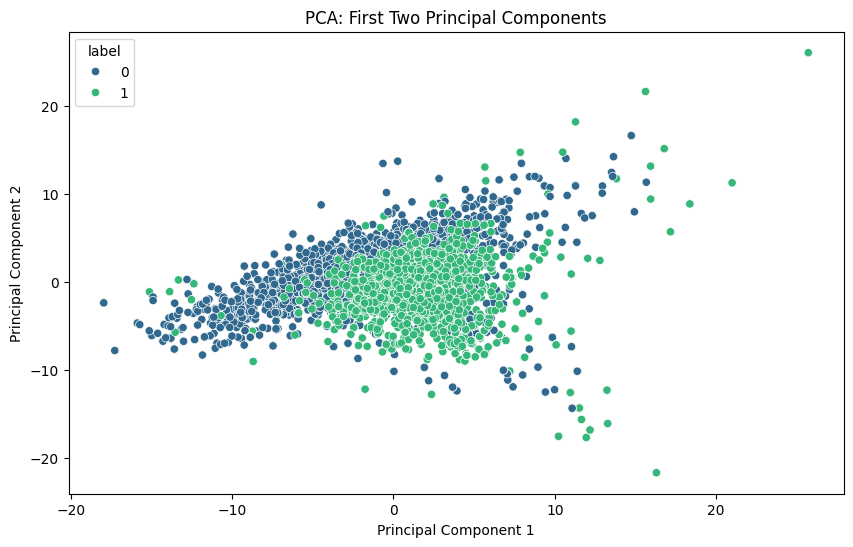

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load balanced dataset
df = pd.read_excel("/content/drive/MyDrive/ML_End_Sem/Telugu/ML_Models_Fasttext/telugu_fasttext_features_output.xlsx")

# Features and labels
X = df[[f'ft_{i}' for i in range(300)]]
y = df['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), explained_variance, marker='o', label='Individual Explained Variance')
plt.plot(range(1, 101), cumulative_variance, marker='x', label='Cumulative Explained Variance')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.legend()
plt.grid(True)
plt.savefig("scree_plot.png")
plt.show()

# 2D Scatter Plot of First Two Components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("pca_scatter_plot.png")
plt.show()

# Save PCA-transformed data
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(100)])
pca_df['label'] = y.values
pca_df.to_excel("telugu_fasttext_pca.xlsx", index=False)

# Save explained variance
pd.DataFrame({
    'Component': range(1, 101),
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance Ratio': cumulative_variance
}).to_csv("pca_variance.csv", index=False)

In [ ]:
pca_df.to_excel("/content/drive/MyDrive/ML_End_Sem/Telugu/ML_Models_Fasttext/telugu_fasttext_pca.xlsx", index=False)


In [ ]:
pd.DataFrame({
    'Component': range(1, 101),
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance Ratio': cumulative_variance
}).to_csv("/content/drive/MyDrive/ML_End_Sem/Telugu/ML_Models_Fasttext/pca_variance.csv", index=False)

ML_Models_SetUp

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Features and labels
X = pca_df[[f'PC{i}' for i in range(1,100)]]
y = pca_df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize results storage
results = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': []}


K-Nearest Neighbors (KNN)




=== KNN ===
Train Accuracy: 0.9440181869849389
Test Accuracy: 0.9113636363636364
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       596
           1       0.88      0.83      0.86       284

    accuracy                           0.91       880
   macro avg       0.90      0.89      0.90       880
weighted avg       0.91      0.91      0.91       880

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2337
           1       0.94      0.89      0.91      1182

    accuracy                           0.94      3519
   macro avg       0.94      0.93      0.94      3519
weighted avg       0.94      0.94      0.94      3519



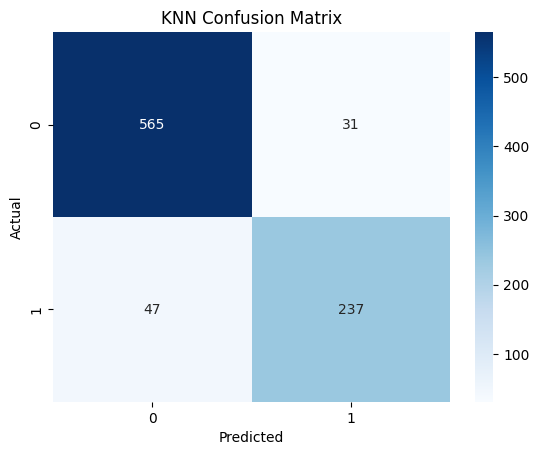

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train_scale)
y_test_pred = model.predict(X_test_scale)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('KNN')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== KNN ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:27:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
Train Accuracy: 0.9977266268826371
Test Accuracy: 0.9477272727272728
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       596
           1       0.96      0.87      0.92       284

    accuracy                           0.95       880
   macro avg       0.95      0.93      0.94       880
weighted avg       0.95      0.95      0.95       880

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2337
           1       1.00      0.99      1.00      1182

    accuracy                           1.00      3519
   macro avg       1.00      1.00      1.00      3519
weighted avg       1.00      1.00      1.00      3519



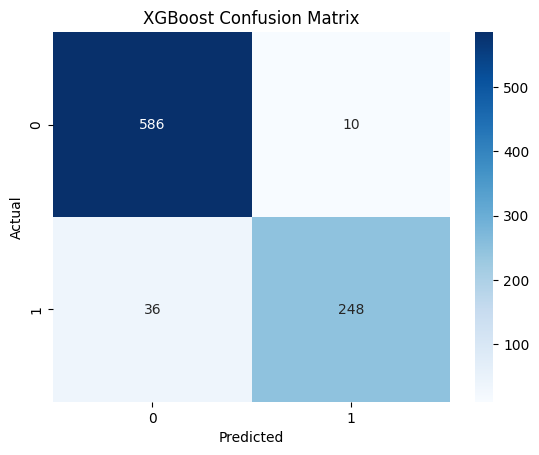

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('XGBoost')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== XGBoost ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest


=== Random Forest ===
Train Accuracy: 0.9977266268826371
Test Accuracy: 0.9318181818181818
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       596
           1       0.99      0.80      0.88       284

    accuracy                           0.93       880
   macro avg       0.95      0.90      0.92       880
weighted avg       0.94      0.93      0.93       880

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2337
           1       1.00      0.99      1.00      1182

    accuracy                           1.00      3519
   macro avg       1.00      1.00      1.00      3519
weighted avg       1.00      1.00      1.00      3519



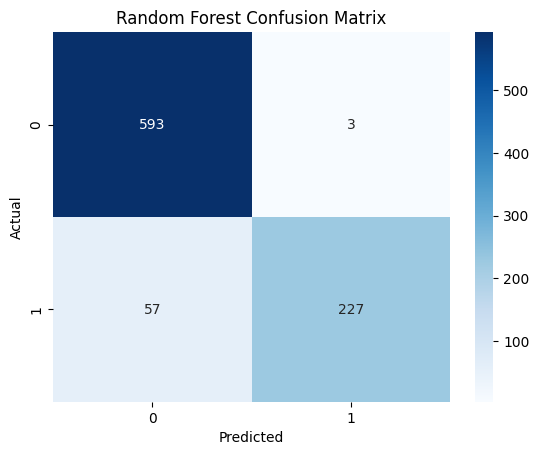

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Random Forest')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Random Forest ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree


=== Decision Tree ===
Train Accuracy: 0.9977266268826371
Test Accuracy: 0.8897727272727273
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       596
           1       0.87      0.78      0.82       284

    accuracy                           0.89       880
   macro avg       0.88      0.86      0.87       880
weighted avg       0.89      0.89      0.89       880

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2337
           1       1.00      0.99      1.00      1182

    accuracy                           1.00      3519
   macro avg       1.00      1.00      1.00      3519
weighted avg       1.00      1.00      1.00      3519



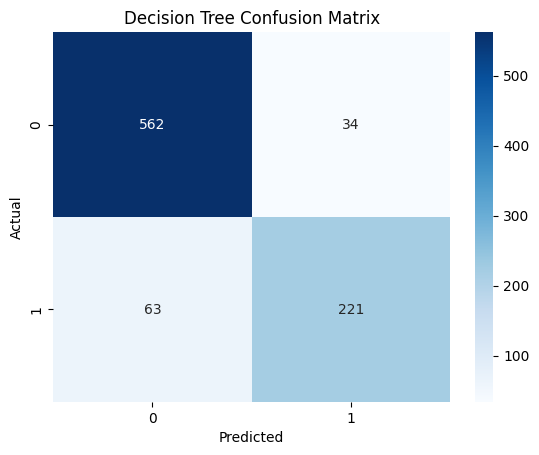

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Decision Tree')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Decision Tree ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


MLP (Neural Network)




=== MLP ===
Train Accuracy: 0.9974424552429667
Test Accuracy: 0.9511363636363637
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       596
           1       0.95      0.89      0.92       284

    accuracy                           0.95       880
   macro avg       0.95      0.94      0.94       880
weighted avg       0.95      0.95      0.95       880



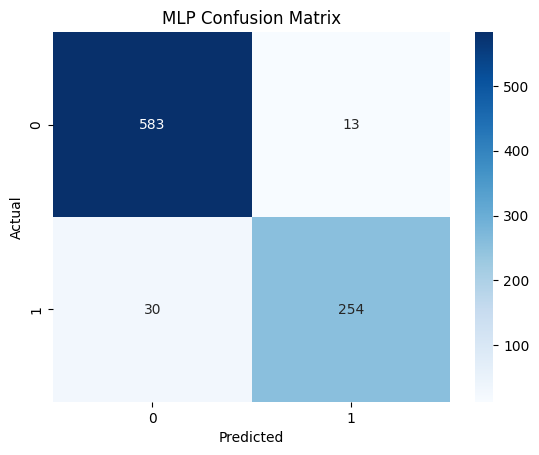

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('MLP')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== MLP ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Support Vector Machine (SVM)




=== SVM ===
Train Accuracy: 0.9585109406081274
Test Accuracy: 0.9431818181818182
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       596
           1       0.97      0.85      0.91       284

    accuracy                           0.94       880
   macro avg       0.95      0.92      0.93       880
weighted avg       0.94      0.94      0.94       880

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2337
           1       0.99      0.89      0.93      1182

    accuracy                           0.96      3519
   macro avg       0.97      0.94      0.95      3519
weighted avg       0.96      0.96      0.96      3519



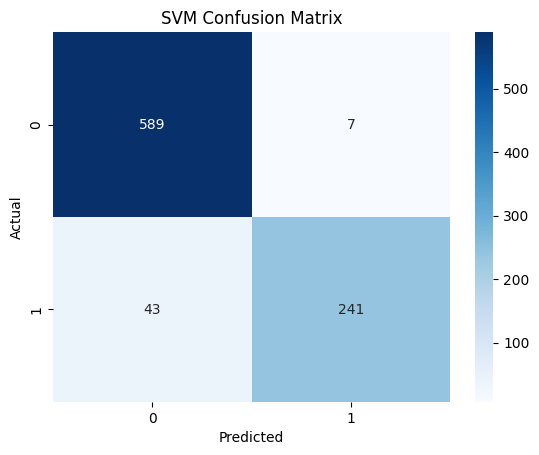

In [ ]:
from sklearn.svm import SVC

model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('SVM')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== SVM ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Bayes


=== Naive Bayes ===
Train Accuracy: 0.7703893151463483
Test Accuracy: 0.759090909090909
              precision    recall  f1-score   support

           0       0.95      0.68      0.79       596
           1       0.58      0.93      0.71       284

    accuracy                           0.76       880
   macro avg       0.76      0.80      0.75       880
weighted avg       0.83      0.76      0.77       880

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      2337
           1       0.60      0.91      0.73      1182

    accuracy                           0.77      3519
   macro avg       0.77      0.81      0.76      3519
weighted avg       0.83      0.77      0.78      3519



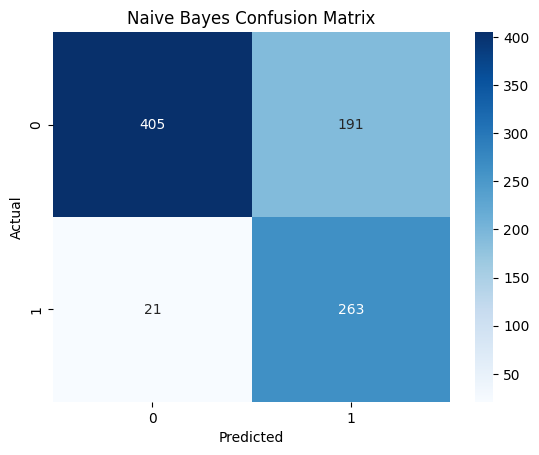

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Naive Bayes')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Naive Bayes ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Stacking Classifier


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:37:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:37:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:37:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:37:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:37:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


=== Stacking Classifier ===
Train Accuracy: 0.9974424552429667
Test Accuracy: 0.9522727272727273
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       596
           1       0.95      0.89      0.92       284

    accuracy                           0.95       880
   macro avg       0.95      0.94      0.94       880
weighted avg       0.95      0.95      0.95       880



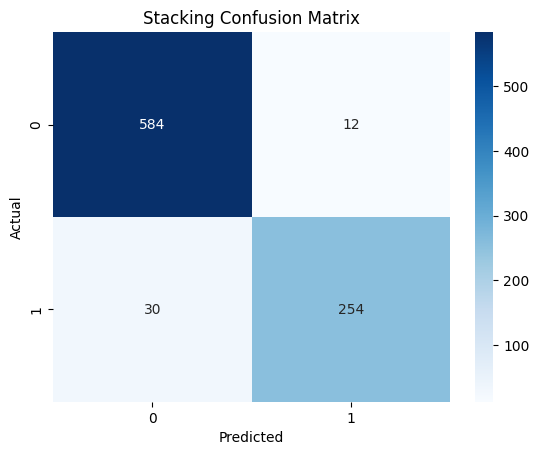

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models again
base_models = [
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('RF', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('NB', GaussianNB())
]

model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Stacking')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Stacking Classifier ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Stacking Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 Final Accuracy Comparison Plot

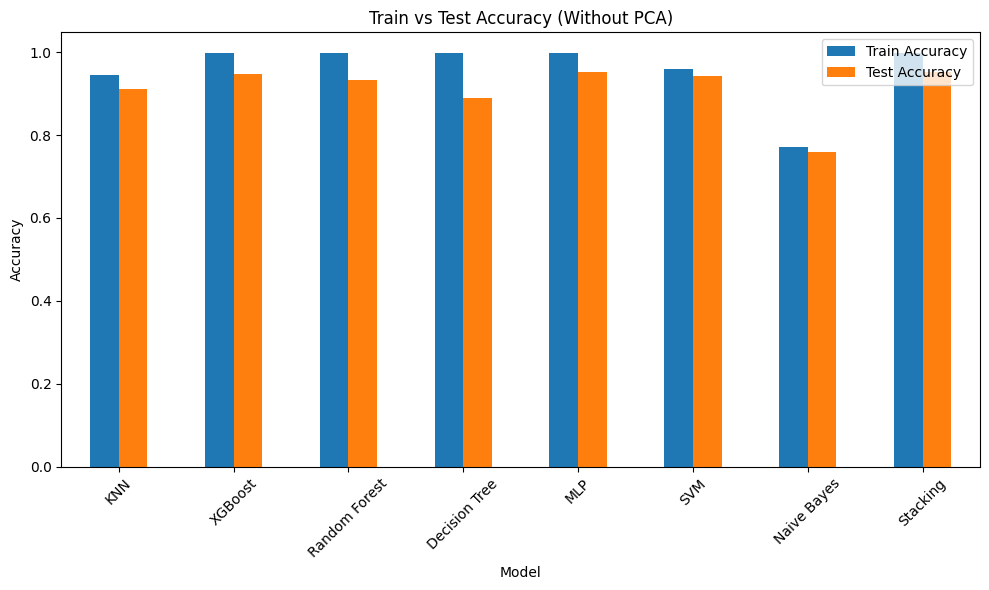

In [ ]:
results_df = pd.DataFrame(results)
results_df = results_df.drop_duplicates(subset='Model')  # Drop duplicate models

results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))
plt.title("Train vs Test Accuracy (Without PCA)")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("accuracy_comparison_without_pca.png")
plt.show()

# Save results
results_df.to_csv("model_results_without_pca.csv", index=False)
